In [1]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [2]:
%reset
from rocketpy import *

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=722
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Motor Setup


Motor Details
Total Burning Time: 1.65 s
Total Propellant Mass: 0.028 kg
Propellant Exhaust Velocity: 596.607 m/s
Average Thrust: 10.206 N
Maximum Thrust: 29.73 N at 0.282 s after ignition.
Total Impulse: 16.839 Ns

Plots


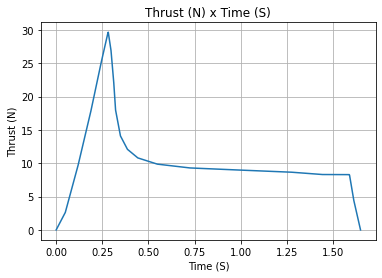

In [3]:

ESTESD12 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Estes_D12.eng",
    burnOut=1.7,
    grainNumber=1,
    grainDensity=1815,
    grainOuterRadius=18 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=50 / 1000,
)

ESTESD12.info()


#### Rocket Setup

Inertia Details
Rocket Dry Mass: 0.232 kg (No Propellant)
Rocket Total Mass: 0.2602248537980141 kg (With Propellant)

Geometrical Parameters
Rocket Radius: 0.02 m

Aerodynamics Stability
Initial Static Margin: 2.655 c
Final Static Margin: 3.002 c

Aerodynamics Plots


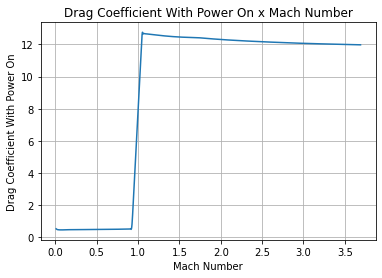

In [4]:
SUBSCALE = Rocket(
    motor=ESTESD12,
    radius=40 / 2000,
    mass=0.232,
    inertiaI=0.0025,
    inertiaZ=0.000277,
    distanceRocketNozzle=-0.128,
    distanceRocketPropellant=-0.128,
    elevation=Env.elevation,
    powerOffDrag="data/proxima/subscale_finless_OFF.csv",
    powerOnDrag="data/proxima/subscale_finless_ON.csv",
)

SUBSCALE.setRailButtons([0.01, -0.028])

NoseCone = SUBSCALE.addNose(length=10/1000, kind="OGIVE", distanceToCM=17.2/100)

FinSet = SUBSCALE.addFins(
    4, span=5/100, rootChord=8/100, tipChord=3/100, distanceToCM=-.129
)
SUBSCALE.info()

#### Flight Data

0.51 29.15 22.39 722.0 19.16 5.04
0.51 29.15 22.39 722.0 19.16 5.04
0.51 29.15 22.39 722.0 19.16 5.04
0.54 39.84 23.42 722.0 18.6 5.8
0.54 39.84 23.42 722.0 18.6 5.8
0.54 39.84 23.42 722.0 18.6 5.8
0.54 38.69 23.38 722.0 18.82 5.84
0.54 38.69 23.38 722.0 18.82 5.84
0.54 38.69 23.38 722.0 18.82 5.84
0.54 38.87 23.38 722.0 18.79 5.84
0.54 38.87 23.38 722.0 18.79 5.84
0.54 38.87 23.38 722.0 18.79 5.84
0.52 38.84 22.65 722.0 17.39 5.23
0.52 38.84 22.65 722.0 17.39 5.23
0.52 38.84 22.65 722.0 17.39 5.23
0.52 39.55 22.65 722.0 17.26 5.24
0.52 39.55 22.65 722.0 17.26 5.24
0.52 39.55 22.65 722.0 17.26 5.24
0.52 39.56 22.65 722.0 17.25 5.24
0.52 39.56 22.65 722.0 17.25 5.24
0.52 39.56 22.65 722.0 17.25 5.24
0.51 39.56 22.46 722.0 16.91 5.09
0.51 39.56 22.46 722.0 16.91 5.09
0.51 39.56 22.46 722.0 16.91 5.09
0.51 39.76 22.46 722.0 16.87 5.09
0.51 39.76 22.46 722.0 16.87 5.09
0.51 39.76 22.46 722.0 16.87 5.09
0.51 39.76 22.4 722.0 16.78 5.05
0.51 39.76 22.4 722.0 16.78 5.05
0.51 39.76 22.4 722.0 

0.9 35.75 32.86 722.0 42.65 15.74
0.9 35.75 32.86 722.0 42.65 15.74
0.9 35.75 32.86 722.0 42.65 15.74
0.9 35.69 33.09 722.0 43.34 16.03
0.9 35.69 33.09 722.0 43.34 16.03
0.9 35.69 33.09 722.0 43.34 16.03
0.91 35.63 33.31 722.0 44.04 16.32
0.91 35.63 33.31 722.0 44.04 16.32
0.91 35.63 33.31 722.0 44.04 16.32
0.92 35.55 33.54 722.0 44.74 16.61
0.92 35.55 33.54 722.0 44.74 16.61
0.92 35.55 33.54 722.0 44.74 16.61
0.93 35.47 33.84 722.0 45.69 17.01
0.93 35.47 33.84 722.0 45.69 17.01
0.93 35.47 33.84 722.0 45.69 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.75 17.01
0.93 35.36 33.84 722.0 45.

1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.88 -3.21 46.4 722.0 -33.92 58.46
1.9 -3.21 46.17 722.0 -32.21 59.27
1.9 -3.21 46.17 722.0 -32.21 59.27
1.9 -3.21 46.17 722.0 -32.21 59.27
1.9 -3.18 46.17 722.0 -33.23 59.27
1.9 -3.18 46.17 722.0 -33.23 59.27
1.9 -3.18 46.17 722.0 -33.23 59.27
1.92 -3.18 45.95 722.0 -31.52 60.07
1.92 -3.18 45.95 72

2.9 -1.73 34.0 722.0 12.31 99.12
2.9 -1.73 34.0 722.0 12.31 99.12
2.9 -1.73 34.0 722.0 12.31 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 34.0 722.0 11.79 99.12
2.9 -1.72 

7.84 0.42 -15.96 722.0 97.42 140.17
7.84 0.42 -15.96 722.0 97.42 140.17
7.84 0.42 -15.96 722.0 97.42 140.17
7.83 0.43 -15.91 722.0 97.96 140.26
7.83 0.43 -15.91 722.0 97.96 140.26
7.83 0.43 -15.91 722.0 97.96 140.26
7.86 0.42 -16.15 722.0 96.19 139.83
7.86 0.42 -16.15 722.0 96.19 139.83
7.86 0.42 -16.15 722.0 96.19 139.83
7.88 0.43 -16.4 722.0 94.52 139.41
7.88 0.43 -16.4 722.0 94.52 139.41
7.88 0.43 -16.4 722.0 94.52 139.41
7.91 0.43 -16.65 722.0 92.81 138.97
7.91 0.43 -16.65 722.0 92.81 138.97
7.91 0.43 -16.65 722.0 92.81 138.97
7.94 0.43 -16.89 722.0 91.08 138.53
7.94 0.43 -16.89 722.0 91.08 138.53
7.94 0.43 -16.89 722.0 91.08 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 0.44 -16.89 722.0 91.2 138.53
7.94 

8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
8.99 1.04 -26.46 722.0 26.14 115.64
9.02 1.04 -26.76 722.0 23.14 114.71
9.02 1.04 -26.76 722.0 23.14 114.71
9.02 1.04 -26.76 722.0 23.14 114.71
9.02 1.06 -26.76 722.0 23.76

0.51 30.46 22.4 722.0 18.82 5.05
0.51 30.46 22.4 722.0 18.82 5.05
0.51 30.46 22.4 722.0 18.82 5.05
0.51 39.83 22.41 722.0 16.78 5.06
0.51 39.83 22.41 722.0 16.78 5.06
0.51 39.83 22.41 722.0 16.78 5.06
0.51 39.81 22.43 722.0 16.82 5.07
0.51 39.81 22.43 722.0 16.82 5.07
0.51 39.81 22.43 722.0 16.82 5.07
0.51 39.79 22.45 722.0 16.85 5.08
0.51 39.79 22.45 722.0 16.85 5.08
0.51 39.79 22.45 722.0 16.85 5.08
0.51 39.77 22.47 722.0 16.89 5.1
0.51 39.77 22.47 722.0 16.89 5.1
0.51 39.77 22.47 722.0 16.89 5.1
0.52 39.75 22.65 722.0 17.23 5.24
0.52 39.75 22.65 722.0 17.23 5.24
0.52 39.75 22.65 722.0 17.23 5.24
0.53 39.55 22.84 722.0 17.61 5.38
0.53 39.55 22.84 722.0 17.61 5.38
0.53 39.55 22.84 722.0 17.61 5.38
0.53 39.35 23.02 722.0 17.99 5.52
0.53 39.35 23.02 722.0 17.99 5.52
0.53 39.35 23.02 722.0 17.99 5.52
0.54 39.16 23.2 722.0 18.36 5.67
0.54 39.16 23.2 722.0 18.36 5.67
0.54 39.16 23.2 722.0 18.36 5.67
0.55 38.98 23.59 722.0 19.15 5.98
0.55 38.98 23.59 722.0 19.15 5.98
0.55 38.98 23.59 722.0 

2.06 -2.92 44.04 722.0 -25.62 66.75
2.06 -2.92 44.04 722.0 -25.62 66.75
2.06 -2.92 44.04 722.0 -25.62 66.75
2.08 -2.89 43.84 722.0 -25.0 67.45
2.08 -2.89 43.84 722.0 -25.0 67.45
2.08 -2.89 43.84 722.0 -25.0 67.45
2.1 -2.86 43.64 722.0 -24.35 68.15
2.1 -2.86 43.64 722.0 -24.35 68.15
2.1 -2.86 43.64 722.0 -24.35 68.15
2.11 -2.84 43.44 722.0 -23.67 68.84
2.11 -2.84 43.44 722.0 -23.67 68.84
2.11 -2.84 43.44 722.0 -23.67 68.84
2.13 -2.81 43.24 722.0 -22.98 69.52
2.13 -2.81 43.24 722.0 -22.98 69.52
2.13 -2.81 43.24 722.0 -22.98 69.52
2.15 -2.79 42.99 722.0 -21.94 70.36
2.15 -2.79 42.99 722.0 -21.94 70.36
2.15 -2.79 42.99 722.0 -21.94 70.36
2.17 -2.76 42.75 722.0 -21.09 71.2
2.17 -2.76 42.75 722.0 -21.09 71.2
2.17 -2.76 42.75 722.0 -21.09 71.2
2.19 -2.73 42.51 722.0 -20.25 72.03
2.19 -2.73 42.51 722.0 -20.25 72.03
2.19 -2.73 42.51 722.0 -20.25 72.03
2.21 -2.69 42.26 722.0 -19.43 72.86
2.21 -2.69 42.26 722.0 -19.43 72.86
2.21 -2.69 42.26 722.0 -19.43 72.86
2.22 -2.66 42.02 722.0 -18.61 73.68
2

0 3.6 0 722.0 0.0 0.0
0 3.6 0 722.0 0.0 0.0
0 3.6 0 722.0 0.0 0.0
0.0 -0.11 0.0 722.0 0.0 0.0
0.0 -0.11 0.0 722.0 0.0 0.0
0.0 -0.11 0.0 722.0 0.0 0.0
0.0 0.34 0.0 722.0 0.0 0.0
0.0 0.34 0.0 722.0 0.0 0.0
0.0 0.34 0.0 722.0 0.0 0.0
0.01 0.79 0.0 722.0 0.0 0.0
0.01 0.79 0.0 722.0 0.0 0.0
0.01 0.79 0.0 722.0 0.0 0.0
0.01 1.69 0.0 722.0 0.0 0.0
0.01 1.69 0.0 722.0 0.0 0.0
0.01 1.69 0.0 722.0 0.0 0.0
0.02 2.59 0.0 722.0 0.0 0.0
0.02 2.59 0.0 722.0 0.0 0.0
0.02 2.59 0.0 722.0 0.0 0.0
0.02 3.49 0.0 722.0 0.0 0.0
0.02 3.49 0.0 722.0 0.0 0.0
0.02 3.49 0.0 722.0 0.0 0.0
0.02 4.17 0.0 722.0 0.0 0.0
0.02 4.17 0.0 722.0 0.0 0.0
0.02 4.17 0.0 722.0 0.0 0.0
0.03 4.85 0.0 722.0 0.0 0.0
0.03 4.85 0.0 722.0 0.0 0.0
0.03 4.85 0.0 722.0 0.0 0.0
0.04 6.21 0.0 722.0 0.0 0.0
0.04 6.21 0.0 722.0 0.0 0.0
0.04 6.21 0.0 722.0 0.0 0.0
0.04 7.56 0.0 722.0 0.0 0.0
0.04 7.56 0.0 722.0 0.0 0.0
0.04 7.56 0.0 722.0 0.0 0.0
0.05 8.92 0.0 722.0 0.0 0.0
0.05 8.92 0.0 722.0 0.0 0.0
0.05 8.92 0.0 722.0 0.0 0.0
0.05 9.31 0.0

1.13 34.5 38.86 722.0 62.76 24.31
1.13 34.5 38.86 722.0 62.76 24.31
1.13 34.5 38.86 722.0 62.76 24.31
1.15 34.42 39.15 722.0 63.85 24.77
1.15 34.42 39.15 722.0 63.85 24.77
1.15 34.42 39.15 722.0 63.85 24.77
1.16 34.34 39.44 722.0 64.95 25.23
1.16 34.34 39.44 722.0 64.95 25.23
1.16 34.34 39.44 722.0 64.95 25.23
1.17 34.25 39.73 722.0 66.07 25.7
1.17 34.25 39.73 722.0 66.07 25.7
1.17 34.25 39.73 722.0 66.07 25.7
1.18 34.16 40.01 722.0 67.19 26.17
1.18 34.16 40.01 722.0 67.19 26.17
1.18 34.16 40.01 722.0 67.19 26.17
1.19 34.06 40.3 722.0 68.32 26.65
1.19 34.06 40.3 722.0 68.32 26.65
1.19 34.06 40.3 722.0 68.32 26.65
1.21 33.96 40.58 722.0 69.46 27.12
1.21 33.96 40.58 722.0 69.46 27.12
1.21 33.96 40.58 722.0 69.46 27.12
1.22 33.87 40.87 722.0 70.61 27.6
1.22 33.87 40.87 722.0 70.61 27.6
1.22 33.87 40.87 722.0 70.61 27.6
1.23 33.79 41.15 722.0 71.75 28.09
1.23 33.79 41.15 722.0 71.75 28.09
1.23 33.79 41.15 722.0 71.75 28.09
1.24 33.72 41.43 722.0 72.89 28.58
1.24 33.72 41.43 722.0 72.89 28.

10.85 2.51 -41.42 722.0 -107.91 52.17
10.85 2.51 -41.42 722.0 -107.91 52.17
10.85 2.51 -41.42 722.0 -107.91 52.17
10.87 2.54 -41.61 722.0 -109.94 51.06
10.87 2.54 -41.61 722.0 -109.94 51.06
10.87 2.54 -41.61 722.0 -109.94 51.06
10.9 2.56 -41.81 722.0 -111.96 49.93
10.9 2.56 -41.81 722.0 -111.96 49.93
10.9 2.56 -41.81 722.0 -111.96 49.93
10.93 2.59 -42.0 722.0 -113.99 48.81
10.93 2.59 -42.0 722.0 -113.99 48.81
10.93 2.59 -42.0 722.0 -113.99 48.81
10.95 2.61 -42.2 722.0 -116.02 47.67
10.95 2.61 -42.2 722.0 -116.02 47.67
10.95 2.61 -42.2 722.0 -116.02 47.67
10.98 2.63 -42.39 722.0 -118.06 46.53
10.98 2.63 -42.39 722.0 -118.06 46.53
10.98 2.63 -42.39 722.0 -118.06 46.53
11.01 2.66 -42.58 722.0 -120.1 45.39
11.01 2.66 -42.58 722.0 -120.1 45.39
11.01 2.66 -42.58 722.0 -120.1 45.39
11.03 2.68 -42.77 722.0 -122.13 44.24
11.03 2.68 -42.77 722.0 -122.13 44.24
11.03 2.68 -42.77 722.0 -122.13 44.24
11.06 2.71 -42.96 722.0 -124.17 43.09
11.06 2.71 -42.96 722.0 -124.17 43.09
11.06 2.71 -42.96 722.0 

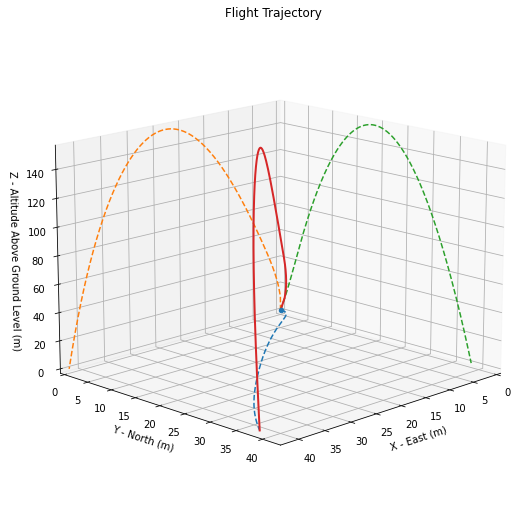



Fin Data



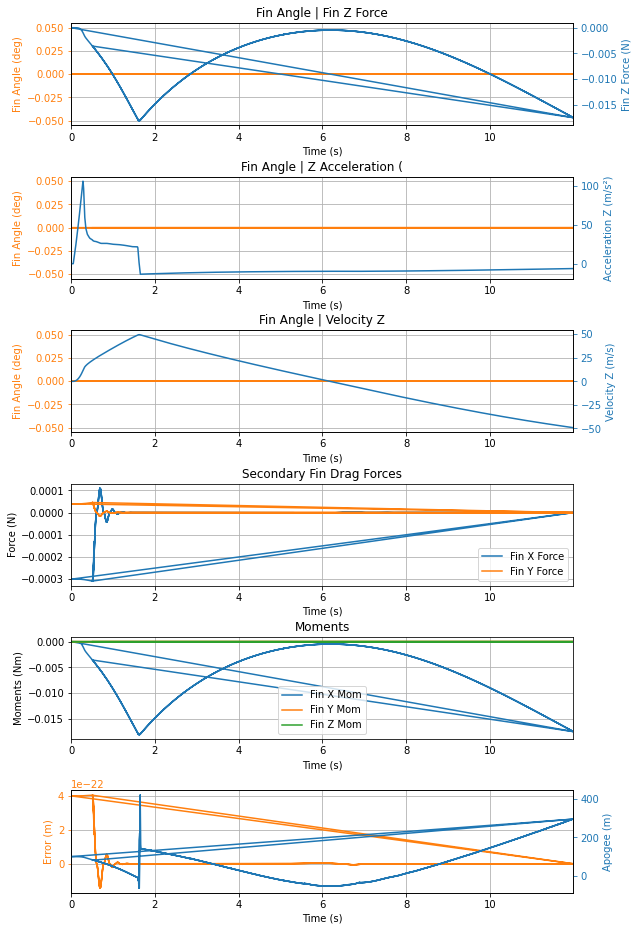



Trajectory Force Plots



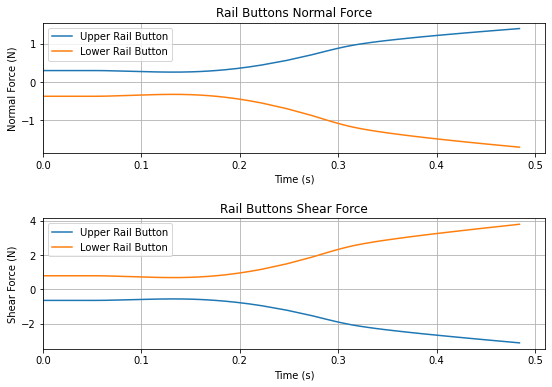

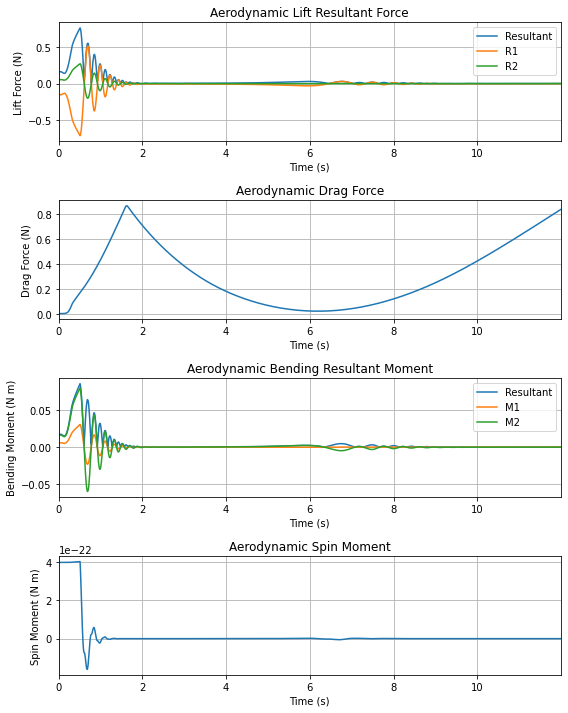



Trajectory Kinematic Plots



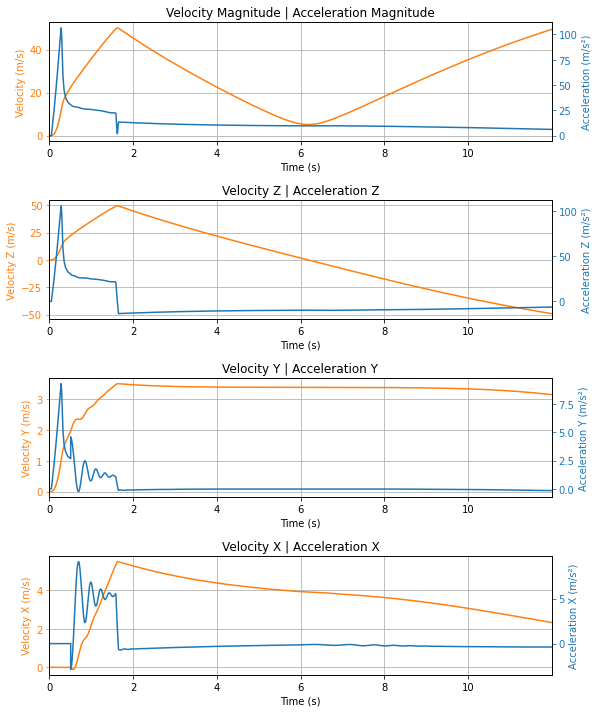



Angular Position Plots



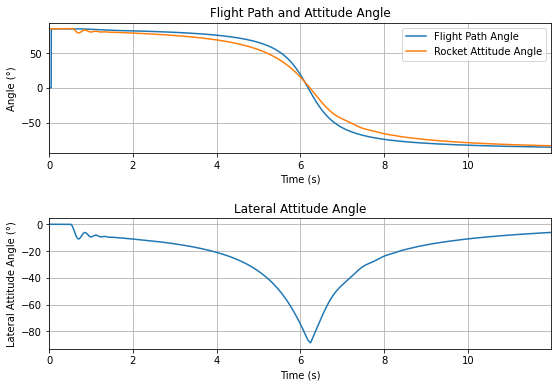



Path, Attitude and Lateral Attitude Angle plots



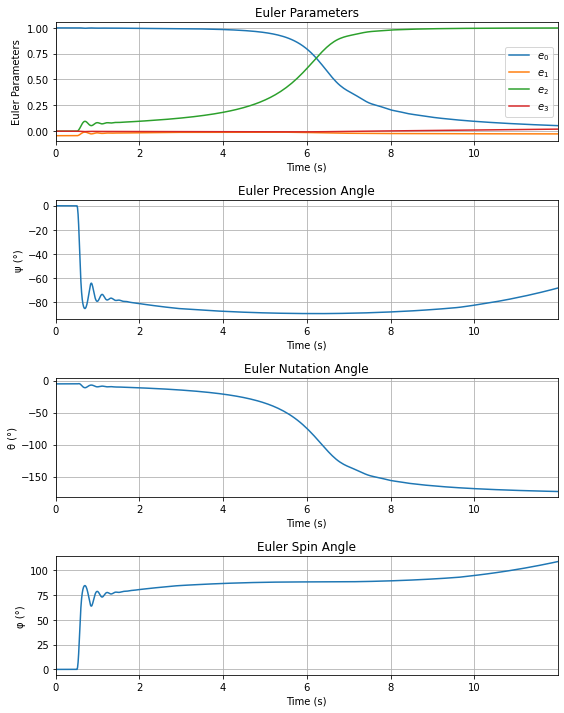



Trajectory Angular Velocity and Acceleration Plots



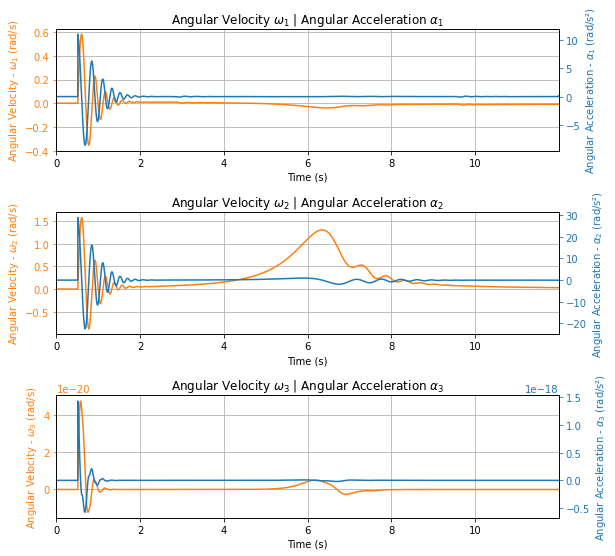



Trajectory Energy Plots



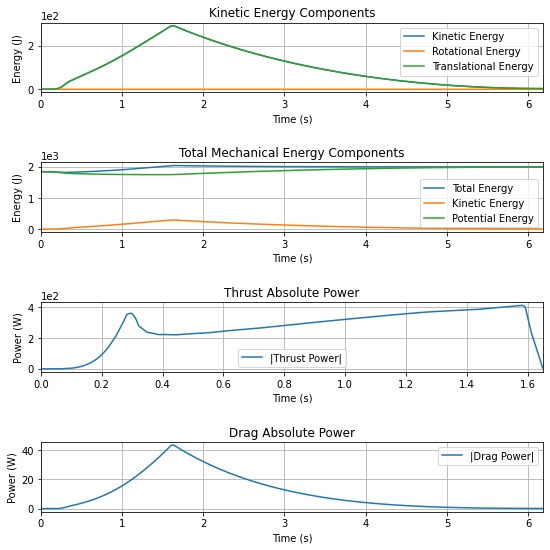



Trajectory Fluid Mechanics Plots



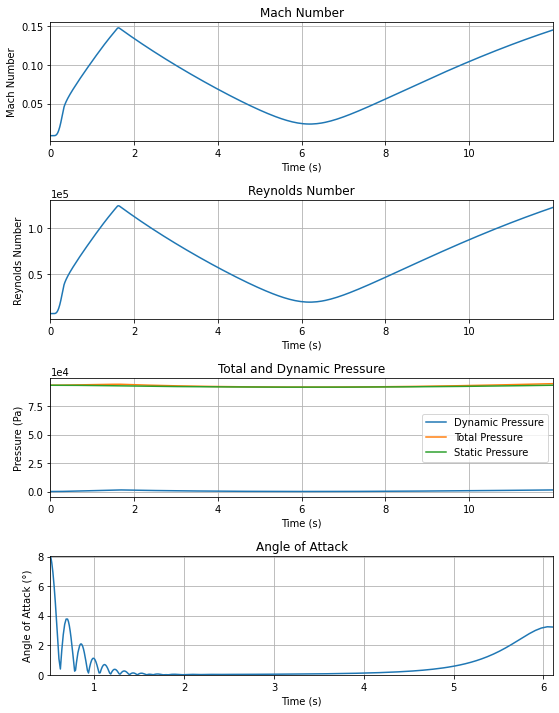



Trajectory Stability and Control Plots



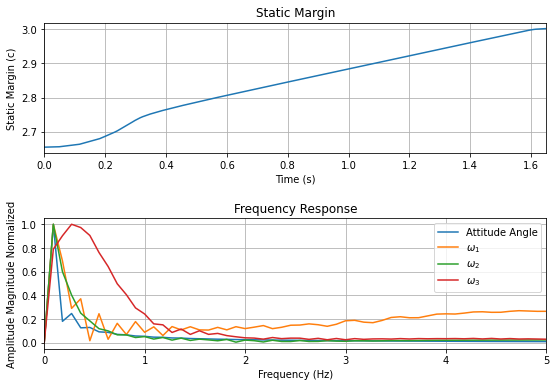

In [5]:
TestFlight = Flight(rocket=SUBSCALE, environment=Env, inclination=85, heading=0, visualiseRocket=False)
#TestFlight.visualise()
TestFlight.allInfo()